In [ ]:
!pip install bilby

     |████████████████████████████████| 11.6MB 338kB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for bilby: filename=bilby-1.0.1-cp36-none-any.whl size=2181064 sha256=d4d49d77c622bc8a832a6980f1e9a9d2e564926ca1847e5e9b2a1892a39829af
  Stored in directory: /root/.cache/pip/wheels/36/30/57/bb47c00d04c8e74b44d1461e800cc358ae712e6f055ae5256c
Successfully built bilby


In [ ]:
!pip install gwpy

     |████████████████████████████████| 1.4MB 2.7MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 2.6MB 17.8MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl size=83604 sha256=99f3e90bac3e3bc16b972e1ba0c1dba54a7ab5c20c5346b3f6c92d5aba44d844
  Stored in directory: /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df
Successfully built ligo-segments


In [ ]:
!pip install lalsuite

     |████████████████████████████████| 27.2MB 149kB/s 
     |████████████████████████████████| 1.6MB 43.2MB/s 
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp36-cp36m-linux_x86_64.whl size=414156 sha256=9ec03d4b92d89803be6205ab6029c6258942756735954f7c04f90b79c80b2009
  Stored in directory: /root/.cache/pip/wheels/aa/fa/38/d61b002c627ca54f03755b9a288f4b1fa83291608a4bc47b7b
Successfully built lscsoft-glue


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


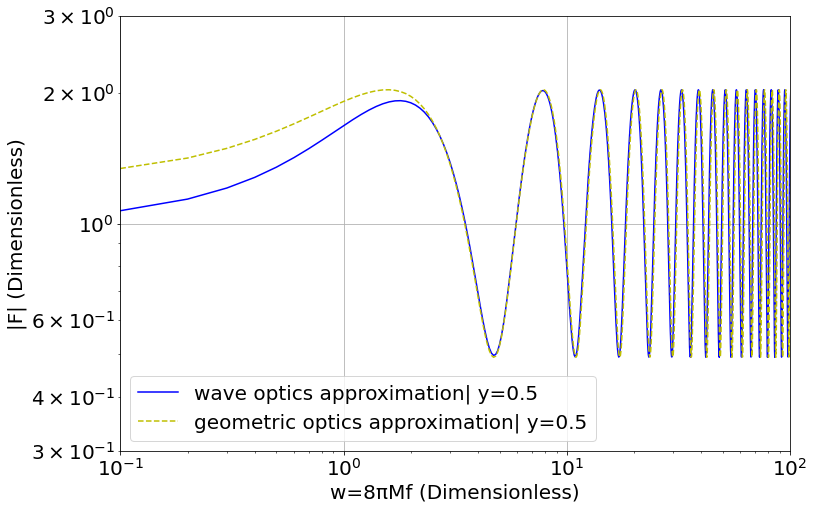

In [ ]:
#necessary imports
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
from __future__ import division, print_function
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt

#defining F in wave optics approximation
def F1(w,y):
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    HYP = [complex(mp.hyp1f1(((1j/2)*z),1.0,((1j/2)*z*y*y))) for z in w]
    F = ((np.exp((np.pi*w)/4)) * (scipy.special.gamma(1-((1j/2)*w))) * HYP * (np.exp(0.5j*w*(np.log(0.5*w)-2.0*phim))))
    return F

#defining F in geometric optics approximation
def F2(w,y,M):      
    muplus=np.abs(0.5 + (y*y + 2) / (2*y * (y*y+4)**0.5))
    muminus=np.abs(0.5 - (y*y + 2) / (2*y * (y*y+4)**0.5))
    deltatd=4*M
    f=w / (8*np.pi*M)
    F=muplus**0.5 - 1j*muminus**0.5 *(np.exp(2*np.pi*1j*f*deltatd))
    return F

#computing them for varying values of w and 3 values of y
w=np.linspace(0.1, 1000, 10000)
M=0.02
f=w / (8*np.pi*M)
y=[0.1,0.5,1.0]
plt.figure(figsize=(12,8))
for i in range(1,2):
  f1=F1(w,y[i])
  f2=F2(w,y[i],M)
  plt.loglog(w,f1,color='blue', label='wave optics approximation| y=0.5')
  plt.loglog(w,f2,'--', color='y',label='geometric optics approximation| y=0.5')

#plot the results
plt.grid(axis='both')
plt.legend(fontsize=20)
plt.xlabel('w=8πMf (Dimensionless)',fontsize=20)
plt.ylabel('|F| (Dimensionless)',fontsize=20)
plt.xlim(0.1,100)
plt.ylim(0.3,3)
plt.show()

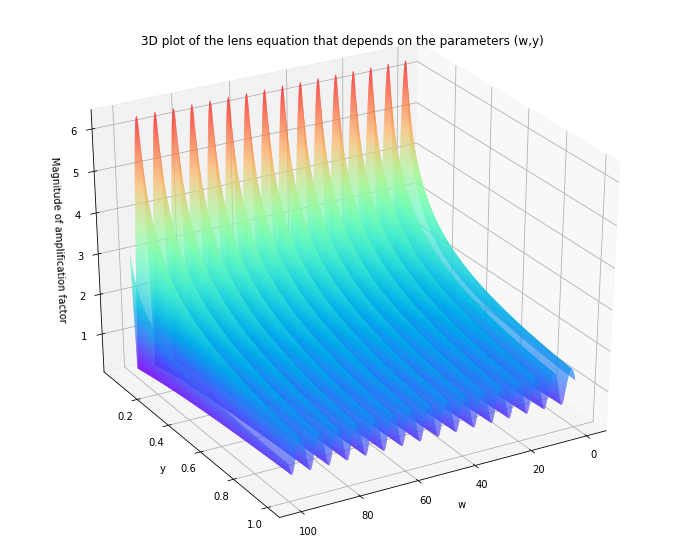

In [ ]:
#repeating the same procedure to plot 3D surface plots of F(w,y)
from __future__ import division, print_function
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt

def F1(w,y):
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    HYP = complex(mp.hyp1f1(((1j/2)*w),1.0,((1j/2)*w*y*y)))
    F = ((np.exp((np.pi*w)/4)) * (scipy.special.gamma(1-((1j/2)*w))) * HYP * (np.exp(0.5j*w*(np.log(0.5*w)-2.0*phim))))
    return F

def F2(w,y,M):      
    muplus=np.abs(0.5 + (y*y + 2) / (2*y * (y*y+4)**0.5))
    muminus=np.abs(0.5 - (y*y + 2) / (2*y * (y*y+4)**0.5))
    deltatd=4*M
    f=w / (8*np.pi*M)
    F=muplus**0.5 - 1j*muminus**0.5 *(np.exp(2*np.pi*1j*f*deltatd))
    return abs(F)

#geometric optics approximation 
w=np.linspace(0.1, 100, 1000)
y=np.linspace(0.05,1.0,1000)
w, y = np.meshgrid(w, y)
l = F2(w, y, 0.02)
lmax = np.amax(l)
L = l / lmax
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(w, y, l, cmap='rainbow',cstride=1,rstride=1)
ax.set_xlabel('w')
ax.set_ylabel('y')
ax.set_zlabel('Magnitude of amplification factor')
ax.set_title('3D plot of the lens equation that depends on the parameters (w,y)')
ax.view_init(30, 60)

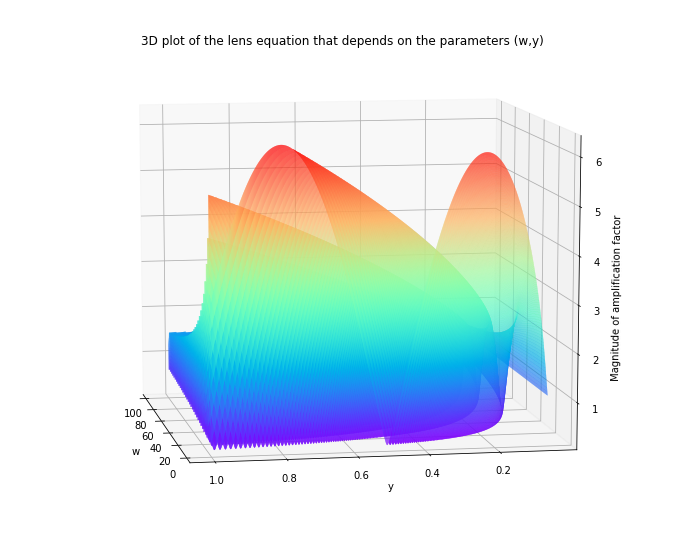

In [ ]:
from __future__ import division, print_function
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt

def F1(w,y):
    a=(1j/2)*w
    b=1.0
    c=(1j/2)*w*y*y
    func2=abs(scipy.special.gamma(1-((1j/2)*w)))
    HYP = (abs(mp.hyp1f1(((1j/2)*w),1.0,((1j/2)*w*y*y))))
    F = abs((np.exp((np.pi*w)/4)) * func2*HYP)
    return F

def F2(w,y,M):      
    muplus=np.abs(0.5 + (y*y + 2) / (2*y * (y*y+4)**0.5))
    muminus=np.abs(0.5 - (y*y + 2) / (2*y * (y*y+4)**0.5))
    deltatd=4*M
    f=w / (8*np.pi*M)
    F=muplus**0.5 - 1j*muminus**0.5 *(np.exp(2*np.pi*1j*f*deltatd))
    return abs(F)

#wave optics approximation
w=np.linspace(0.1, 100, 1000)
y=np.linspace(0.05,1.0,1000)
l=np.zeros([1000,1000])
for i,z in enumerate(w):
  for j,x in enumerate(y):
    l[i][j] = F1(w[i], y[j])
w, y = np.meshgrid(w, y)
lmax = np.amax(l)
L = l / lmax
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(w, y, l, cmap='rainbow',cstride=1,rstride=1)
ax.set_xlabel('w')
ax.set_ylabel('y')
ax.set_zlabel('Magnitude of amplification factor')
ax.set_title('3D plot of the lens equation that depends on the parameters (w,y)')
ax.view_init(10, 170)

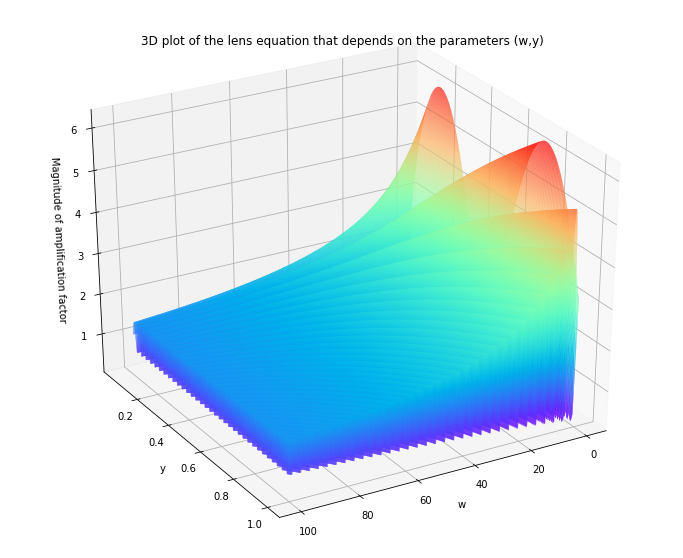

In [ ]:
#wave optics approximation - changed viewing angle
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(w, y, l, cmap='rainbow',cstride=1,rstride=1)
ax.set_xlabel('w')
ax.set_ylabel('y')
ax.set_zlabel('Magnitude of amplification factor')
ax.set_title('3D plot of the lens equation that depends on the parameters (w,y)')
ax.view_init(30, 60)